# Vježba 7 - Uvod u digitalnu obradu slike

## Uvod

Cilj ove vježbe je upoznavanje sa osnovnim operacijama digitalne obrade slike: operacijama u tački kod kojih se svjetlina izlaznog piksela izračunava samo na osnovu svjetline ulaznog piksela i lokalnim operacijama kod kojih se svjetlina izlaznog piksela izračunava na osnovu svjetlina piksela iz njegove okoline.

## Operacije u tački

Histogram je funkcija koja za svaku boju, odnosno, vrijednost intenziteta daje broj piksela te boje, odnosno, vrijednosti intenziteta u nekom regionu. Jedna od mogućnosti za crtanje histograma u Python-u je da se iskoristi funkcija <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html">hist</a> iz matplotlib biblioteke. Za crtanje histograma slike ovoj funkciji je porebno proslijediti vektor (niz reda 1) koji sadrži sve intenzitete sa slike, te zadati:
1. broj binova (standardan broj koji se koristi u obradi slike je 256), 
2. opseg vrijednosti za koji se vrši računanje,
3. te definisati kojim tipom se crta histogram (standardno bar).
Kada se želi postići poboljšanje kontrasta na slici često se koriste operacije zasnovane na transformacijama histograma. Jedna od često korištenih operacija je razvlačenje histograma. Matematički se transformacija intenziteta može iskazati na sljedeći način. Ako je potrebno nivoe svjetline piksela polazne slike $a(m, n)$ koje se nalaze između vrijednosti $p_{low}$ i $p_{high}$ preslikati u opseg svjetlina od $s_{low}$ do $s_{high}$ koristi se sljedeća transformacija:
$$b(m, n) = \begin{cases}
  s_{low}, & a(m, n)<p_{low}\\    
  (s_{high}-s_{low})\left(\frac{a(m, n) - p_{low}}{p_{high} - p_{low}}\right)^{\gamma}+s_{low}, & p_{low} \le a(m, n) \le p_{high}\\
  s_{high}, & a(m, n) > p_{high}
\end{cases}.$$
Ako je razvlačenje histograma linearno $\gamma$ je jednako 1. Druge vrijednost $\gamma$ daju nelinearno razvlačenje histograma.

## Lokalne operacije

Transformacije histograma pripadaju grupi operacija u tački. Pored ovih operacija značajne su i lokalne operacije kod kojih se vrijednost intenziteta piksela izračunava korištenjem vrijednosti intenziteta piksela iz neke njegove okoline. Uobičajen termin za korištenje ovih operacija je filtriranje slike. Funkcija kojom se vrši filtriranje slike u Python-u je <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html">convolve2d</a> iz scipy biblioteke. Dok za određene često korištene filtre već postoje predefinisane funkcije u <a href="http://scikit-image.org/docs/stable/api/skimage.filters.html">skimage biblioteci</a>.

### Zadaci

Kako se u sklopu većine fukcija koje se vrše nad slikama vrše operacije koje mogu proizvesti necjelobrojan izlaz, preporučljivo je prije vršenja bilo kakvih fukcija nad slikom konvertovati sliku u floating point podatak. Ovakva konverzija je omogućena funkcijom <a href="http://scikit-image.org/docs/dev/api/skimage.html#img-as-float">img_as_float</a> iy skimage biblioteke.

<ol>
<li>Napisati funkciju u Python-u kojom će se realizovati razvlačenje histograma opisano u sekciji "Operacije u tački".
</li>
</ol>

In [22]:
from skimage import img_as_float
import numpy as np

def imadjust(image, p_low, p_high, s_low, s_high, gamma):
    ### KOD
    image_float = img_as_float(image)
    out = (s_high - s_low) * (((image_float - p_low) / (p_high - p_low)) ** gamma) + s_low
    out[image_float < p_low] = s_low
    out[image_float > p_high] = s_high
    return out


    # b = np.zeros(image.shape[0])
    #for i, value_row in enumerate(image.shape[0]):
    #    for j, value_column in enumerate(value_row):
    #        if value_column < p_low:
    #            b[i][j] = 

<ol start = "2">
<li> Učitati sliku pout.tif. Prikazati sliku i njen histogram. Kakva je pokrivenost dinamičkog opsega?
</li>
</ol>

(array([6.000e+00, 1.050e+02, 0.000e+00, 0.000e+00, 0.000e+00, 1.110e+03,
        3.570e+03, 0.000e+00, 0.000e+00, 0.000e+00, 4.425e+03, 0.000e+00,
        0.000e+00, 1.065e+04, 0.000e+00, 9.210e+03, 0.000e+00, 5.985e+03,
        0.000e+00, 0.000e+00, 4.701e+03, 0.000e+00, 6.963e+03, 0.000e+00,
        0.000e+00, 4.743e+03, 0.000e+00, 0.000e+00, 0.000e+00, 4.257e+03,
        0.000e+00, 0.000e+00, 5.247e+03, 0.000e+00, 4.845e+03, 4.074e+03,
        0.000e+00, 0.000e+00, 0.000e+00, 4.620e+03, 7.788e+03, 0.000e+00,
        5.148e+03, 0.000e+00, 0.000e+00, 0.000e+00, 4.068e+03, 3.498e+03,
        0.000e+00, 3.708e+03, 0.000e+00, 0.000e+00, 3.780e+03, 0.000e+00,
        3.747e+03, 0.000e+00, 3.117e+03, 0.000e+00, 2.154e+03, 1.875e+03,
        0.000e+00, 1.647e+03, 0.000e+00, 0.000e+00, 1.701e+03, 0.000e+00,
        1.503e+03, 0.000e+00, 1.506e+03, 0.000e+00, 0.000e+00, 1.542e+03,
        0.000e+00, 1.425e+03, 0.000e+00, 0.000e+00, 1.455e+03, 0.000e+00,
        1.794e+03, 0.000e+00, 3.777e+0

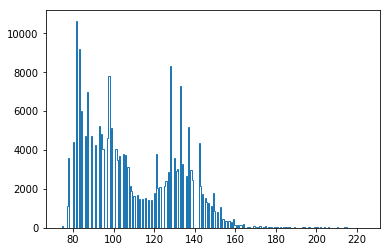

In [23]:
### KOD
%matplotlib inline
from skimage import io
import matplotlib.pyplot as plt
image = io.imread("pout.tiff")
plt.hist(image.ravel(), bins=256, range=(image.min(), image.max()), histtype='step')

<ol start = "3">
<li> Formirati novu sliku tako što ćete opseg intenziteta $[0.3, 0.65]$ linearno preslikati u opseg $[0, 1]$. Prikazati dobijenu sliku i njen histogram. Šta se desilo sa kontrastom na slici? Kako se ta promjena ogleda na histogramu?
</li>
</ol>

[[[0.37535014 0.37535014 0.37535014]
  [0.37535014 0.37535014 0.37535014]
  [0.33053221 0.33053221 0.33053221]
  ...
  [0.10644258 0.10644258 0.10644258]
  [0.08403361 0.08403361 0.08403361]
  [0.07282913 0.07282913 0.07282913]]

 [[0.35294118 0.35294118 0.35294118]
  [0.35294118 0.35294118 0.35294118]
  [0.35294118 0.35294118 0.35294118]
  ...
  [0.10644258 0.10644258 0.10644258]
  [0.10644258 0.10644258 0.10644258]
  [0.07282913 0.07282913 0.07282913]]

 [[0.36414566 0.36414566 0.36414566]
  [0.36414566 0.36414566 0.36414566]
  [0.35294118 0.35294118 0.35294118]
  ...
  [0.08403361 0.08403361 0.08403361]
  [0.08403361 0.08403361 0.08403361]
  [0.08403361 0.08403361 0.08403361]]

 ...

 [[0.2745098  0.2745098  0.2745098 ]
  [0.28571429 0.28571429 0.28571429]
  [0.24089636 0.24089636 0.24089636]
  ...
  [0.07282913 0.07282913 0.07282913]
  [0.06162465 0.06162465 0.06162465]
  [0.06162465 0.06162465 0.06162465]]

 [[0.24089636 0.24089636 0.24089636]
  [0.24089636 0.24089636 0.24089636]


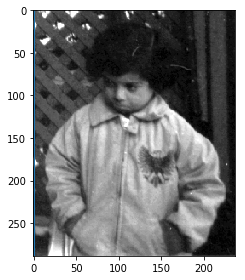

In [26]:
### KOD
img_adjust = imadjust(image=image, p_low=0.3, p_high=0.65, s_low=0, s_high=1, gamma=1)
print(img_adjust)
plt.hist(img_adjust.ravel(), bins=256, range=(img_adjust.min(), img_adjust.max()), histtype='step')
io.imshow(img_adjust)

<ol start = "4">
<li> Učitati sliku cameraman.tif. Prikazati sliku i njen histogram.
</li>
</ol>

(array([4.000e+00, 4.230e+02, 1.477e+03, 1.259e+03, 1.175e+03, 1.456e+03,
        1.529e+03, 1.685e+03, 1.338e+03, 9.680e+02, 4.710e+02, 2.610e+02,
        1.870e+02, 1.690e+02, 1.400e+02, 1.070e+02, 1.090e+02, 1.040e+02,
        9.600e+01, 9.900e+01, 1.140e+02, 8.600e+01, 1.080e+02, 9.100e+01,
        7.600e+01, 0.000e+00, 9.900e+01, 9.200e+01, 8.300e+01, 1.050e+02,
        8.500e+01, 1.000e+02, 9.800e+01, 9.700e+01, 8.100e+01, 8.600e+01,
        8.000e+01, 1.060e+02, 6.800e+01, 5.900e+01, 7.200e+01, 7.700e+01,
        6.500e+01, 7.000e+01, 6.100e+01, 6.700e+01, 5.000e+01, 6.400e+01,
        7.400e+01, 6.700e+01, 5.900e+01, 0.000e+00, 7.000e+01, 8.500e+01,
        8.000e+01, 6.800e+01, 7.200e+01, 7.400e+01, 8.600e+01, 8.700e+01,
        7.600e+01, 6.700e+01, 6.100e+01, 6.700e+01, 6.200e+01, 4.300e+01,
        5.700e+01, 5.500e+01, 4.300e+01, 6.700e+01, 5.200e+01, 5.300e+01,
        3.600e+01, 4.700e+01, 5.200e+01, 5.000e+01, 0.000e+00, 4.500e+01,
        6.400e+01, 5.200e+01, 6.800e+0

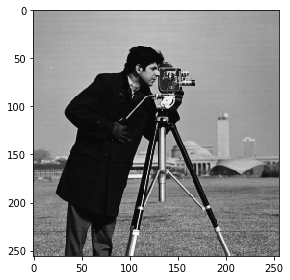

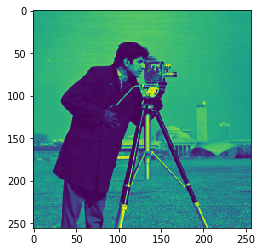

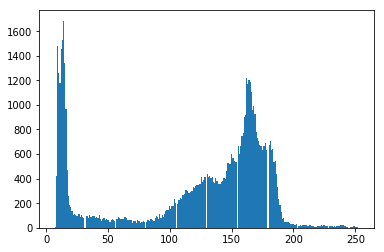

In [38]:
### KOD
image_cameraman = io.imread('cameraman.tif')
io.imshow(image_cameraman)
plt.figure()
plt.imshow(image_cameraman)

plt.figure()
plt.hist(image_cameraman.ravel(), bins=256, range=(image_cameraman.min(), image_cameraman.max()), histtype='barstacked')

<ol start = "5">
<li> Na osnovu slike i njenog histograma odrediti kojem opsegu intenziteta pripadaju pikseli kaputa? Preslikati linearno taj opseg u opseg $[0.5, 1]$. Prikazati dobijenu sliku. Šta se desilo sa slikom u cjelini? Šta se desilo sa opsegom intenziteta piksela kaputa? Šta je na taj način postignuto? Šta se desilo sa pozadinom? Zašto?
</li>
</ol>

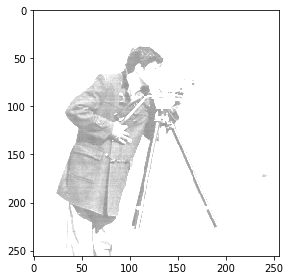

In [49]:
### KOD
image_cameraman = io.imread('cameraman.tif')
plt.figure()
img_adjust = imadjust(image=image_cameraman, p_low=5/255, p_high=20/255, s_low=0.5, s_high=1, gamma=1)

plt.hist(img_adjust.ravel(), bins=256, range=(img_adjust.min(), img_adjust.max()), histtype='barstacked')
plt.imshow(img_adjust, cmap='gray')
io.imshow(img_adjust)

<ol start = "6">
<li> Formirati novu sliku koja predstavlja negativ slike iz tačke 4.
</li>
</ol>

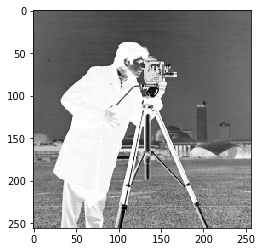

In [55]:
### KOD
image_cameraman = io.imread('cameraman.tif')
plt.figure()
img_negative = 255 - image_cameraman 
plt.imshow(img_negative, cmap='gray')

<ol start = "7">
<li> Preslikati nelinearno cijeli opseg intenziteta sa vrijednostima parametra gamma $0.5$ i $1.5$. Prikazati dobijene slike. Šta se dešava sa slikom u ovim slučajevima? Objasniti nastale promjene?
</li>
</ol>

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


(array([16905.,   102.,    45.,    64.,     0.,    52.,    68.,    69.,
           64.,     0.,    55.,    82.,     0.,    92.,     0.,    88.,
           75.,     0.,   110.,     0.,    78.,     0.,   101.,     0.,
           86.,     0.,   116.,     0.,   135.,     0.,   144.,     0.,
          145.,     0.,   180.,     0.,   154.,     0.,     0.,   179.,
            0.,   179.,     0.,   231.,     0.,     0.,   203.,     0.,
          196.,     0.,     0.,   225.,     0.,   245.,     0.,     0.,
          236.,     0.,   266.,     0.,     0.,   266.,     0.,     0.,
          276.,     0.,   307.,     0.,     0.,   296.,     0.,     0.,
          285.,     0.,     0.,   284.,     0.,     0.,   295.,     0.,
            0.,   296.,     0.,     0.,   331.,     0.,     0.,   326.,
            0.,     0.,   340.,     0.,     0.,   351.,     0.,     0.,
          351.,     0.,     0.,   360.,     0.,     0.,   359.,     0.,
            0.,   410.,     0.,     0.,   374.,     0.,     0., 

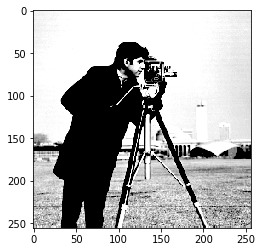

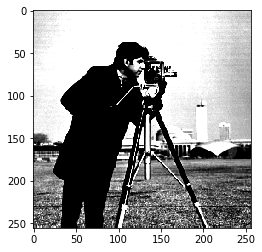

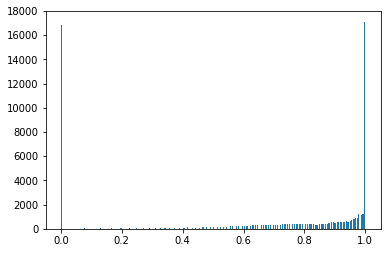

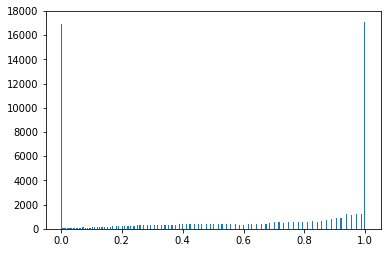

In [65]:
image_cameraman = io.imread('cameraman.tif')
img_adjust_gamma_min = imadjust(image=image_cameraman, p_low=0.3, p_high=0.65, s_low=0, s_high=1, gamma=0.5)
img_adjust_gamma_max = imadjust(image=image_cameraman, p_low=0.3, p_high=0.65, s_low=0, s_high=1, gamma=1.5)
plt.figure()
plt.imshow(img_adjust_gamma_min, cmap='gray')
plt.figure()
plt.imshow(img_adjust_gamma_max, cmap='gray')
plt.figure()
plt.hist(img_adjust_gamma_min.ravel(), bins=256, range=(img_adjust_gamma_min.min(), img_adjust_gamma_min.max()), histtype='bar')
plt.figure()
plt.hist(img_adjust_gamma_max.ravel(), bins=256, range=(img_adjust_gamma_max.min(), img_adjust_gamma_max.max()), histtype='bar')
### KOD

<ol start = "8">
<li> Jedna od osnvovnih primjena lokalnih operacija je detekcija ivica. Iskoristiti operatore definisane u skimage biblioteci (Sobel, Roberts, Prewitt, Scharr) da se odrede ivice na slici cameraman.tif. Zatim dodati šum na sliku korištenjem funkcije <a href="http://scikit-image.org/docs/stable/api/skimage.util.html#skimage.util.random_noise">random_noise</a> iz skimage biblioteke, za varijansu šuma uzeti $0.01$. Na ovako dobijenu sliku ponovo primjeniti operatore za detekciju ivica. Prokomentrisati dobijene rezultate i predložiti način za popravljanje ovih rezultata.
</li>
</ol>

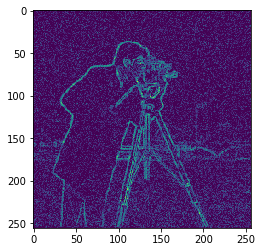

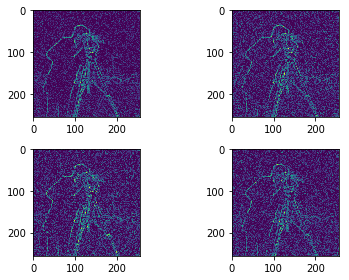

In [80]:
### KOD
from skimage.filters import sobel, roberts, prewitt, scharr
from skimage.util import random_noise
image = io.imread('cameraman.tif')
image_sobel = sobel(image)
image_roberts = roberts(image)
image_prewitt = prewitt(image)
image_scharr = scharr(image)
plt.figure()
img_random_noise = random_noise(image=image_sobel, mode='gaussian', var=0.01)
plt.imshow(img_random_noise)

plt.figure()
plt.subplot(2, 2, 1)
image_sobel = random_noise(image=image_sobel, mode='gaussian', var=0.01)
plt.imshow(image_sobel)

plt.subplot(2, 2, 2)
image_roberts = random_noise(image=image_sobel, mode='gaussian', var=0.01)
plt.imshow(image_roberts)

plt.subplot(2, 2, 3)
image_prewitt = random_noise(image=image_sobel, mode='gaussian', var=0.01)
plt.imshow(image_prewitt)

plt.subplot(2, 2, 4)
image_scharr = random_noise(image=image_sobel, mode='gaussian', var=0.01)
plt.imshow(image_scharr)
plt.tight_layout()

<ol start = "9">
<li> Učitati i prikazati sliku blurry_moon.tif. Može se primijetiti da je ova slika blago zamućena. Primijeniti na ovu sliku Laplasov filtar.
$$\begin{bmatrix}
    0 & 1 & 0\\
    1 & -4 & 1\\
    0 & 1 & 0
\end{bmatrix}$$
Obratite pažnju da pošto Laplasov filtar sadrži i negativan koeficijent može se očekivati da će rezultujuća slika sadržati piksele sa negativnom vrijednošću. Pronaći sada razliku originalne slike i slike dobijene nakon filtriranja Laplasovim filtrom. Prikazati dobijenu sliku. Kakav zaključak možete izvesti? Filtar implementiran na ovaj način zove se unsharp mask.
</li>
</ol>

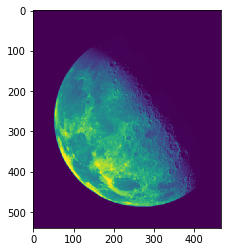

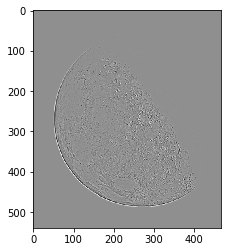

In [79]:
### KOD
from scipy import signal
img = io.imread('blurry_moon.tif')
laplace_filtar = np.array([[0, 1, 0],
                          [1, -4, 1],
                          [0, 1, 0]])
img_laplace = signal.convolve2d(img, laplace_filtar, mode='same', boundary='symm')
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(img_laplace, cmap='gray')
plt.imsave(fname='nova.tif', arr=img_laplace, cmap='gray')